## Project 2 Monte Carlo Simulation



### Import Dependencies

In [1]:
# Import libraries and dependencies
import os
import pandas as pd
import yfinance as yf
from MCForecastTools import MCSimulation

In [2]:
# Import warnings to ignore warnings
import warnings

warnings.filterwarnings('ignore')

In [3]:
# # Load .env enviroment variables
# from dotenv import load_dotenv
# load_dotenv()

In [4]:
# # Set yfinance API key and secret
# yfinance_api_key = os.getenv("YFINANCE_API_KEY")
# yfinance_secret_key = os.getenv("YFINANCE_SECRET_KEY")

# api = tradeapi.REST(
#     yfinance_api_key,
#     yfinance_secret_key,
#     api_version = "v2"
# )

In [5]:
# import yfinance "SPY"

spy = yf.Ticker("SPY")

# get all stock info
spy.info

# get historical market data
hist = spy.history(period="6mo")

# Display sample data
# df_ticker.head()
print(yf.Ticker('spy').info)

{'longBusinessSummary': 'The Trust seeks to achieve its investment objective by holding a portfolio of the common stocks that are included in the index (the “Portfolio”), with the weight of each stock in the Portfolio substantially corresponding to the weight of such stock in the index.', 'maxAge': 86400, 'priceHint': 2, 'previousClose': 427.31, 'open': 425.06, 'dayLow': 420.18, 'dayHigh': 427.3729, 'regularMarketPreviousClose': 427.31, 'regularMarketOpen': 425.06, 'regularMarketDayLow': 420.18, 'regularMarketDayHigh': 427.3729, 'trailingPE': 21.237375, 'volume': 103339601, 'regularMarketVolume': 103339601, 'averageVolume': 76133912, 'averageVolume10days': 95374740, 'averageDailyVolume10Day': 95374740, 'bid': 421.52, 'ask': 421.57, 'bidSize': 800, 'askSize': 1400, 'yield': 0.0145000005, 'totalAssets': 412799303680, 'fiftyTwoWeekLow': 348.11, 'fiftyTwoWeekHigh': 459.44, 'fiftyDayAverage': 443.1764, 'twoHundredDayAverage': 419.1704, 'trailingAnnualDividendRate': 5.662, 'trailingAnnualDiv

In [6]:
# import yfinance "AGG"

agg = yf.Ticker("AGG")

# get all stock info
agg.info

# get historical market data
hist = agg.history(period="6mo")

# Display sample data
# df_ticker.head()
print(yf.Ticker('AGG').info)


{'phone': '1-800-474-2737', 'longBusinessSummary': 'The index measures the performance of the total U.S. investment-grade bond market. The fund will invest at least 80% of its assets in the component securities of the underlying index and TBAs that have economic characteristics that are substantially identical to the economic characteristics of the component securities of the underlying index, and the fund will invest at least 90% of its assets in fixed income securities of the types included in the underlying index that the advisor believes will help the fund track the underlying index.', 'maxAge': 86400, 'priceHint': 2, 'previousClose': 93.13, 'open': 92.99, 'dayLow': 92.3745, 'dayHigh': 93.086, 'regularMarketPreviousClose': 93.13, 'regularMarketOpen': 92.99, 'regularMarketDayLow': 92.3745, 'regularMarketDayHigh': 93.086, 'trailingPE': 117.85715, 'volume': 12045277, 'regularMarketVolume': 12045277, 'averageVolume': 7974028, 'averageVolume10days': 10695660, 'averageDailyVolume10Day': 

In [7]:
# # Set file path drawing data
# # S&P 500 (^GSPC)
# gspc_df= https://finance.yahoo.com/quote/%5EGSPC?p=^GSPC&.tsrc=fin-srch

# # iShares U.S. Treasury Bond ETF (GOVT)
# govt_df= https://finance.yahoo.com/quote/GOVT?p=GOVT&.tsrc=fin-srch

### Get Past 6 months worth of SP500 and GOVT Price Data via Y Finance

In [8]:
# # Set the ticker
# ticker = "SPY"

# # Set timeframe to "1Day"
# timeframe = "15Min"

# # Set start and end datetimes of 6 months from Today
# start_date = pd.Timestamp("2023-07-04", tz="America/New_York").isoformat()
# end_date = pd.Timestamp("2023-10-02", tz="America/New_York").isoformat()

# # Get 1 year's worth of historical data for AAPL
# ticker_data = api.get_bars(
#     ticker,
#     timeframe,
#     start=start_date,
#     end=end_date
# ).df

# ticker_data.head()

In [9]:
# Set the ticker information
tickers = ["SPY","AGG"]

# Set timeframe to "15Min"
timeframe = "15Min"

# Set start and end datetimes between now and 6 month back.
# start_date = pd.Timestamp("2023-07-11", tz="America/New_York").isoformat()
# end_date = pd.Timestamp("2023-08-02", tz="America/New_York").isoformat()



# Get 6 month's worth of historical price data for SP500 and GOVT
SPY = yf.download("SPY", period="6mo")
    # tickers,
    # timeframe,
    # start=start_date,
    # end=end_date
# ).df

# # Display sample data
# display(df_ticker.head())
# display(df_ticker.tail())

[*********************100%%**********************]  1 of 1 completed


In [10]:
# Rewrite the column names
columns = ["open", "high", "low", "close", "adj close", "volume"]
SPY.columns = columns
SPY.head()

,open,high,low,close,adj close,volume
Date,,,,,,
2023-04-04,411.619995,411.920013,407.239990,408.670013,405.726471,66601500
2023-04-05,407.910004,408.700012,405.880005,407.600006,404.664154,65200200
2023-04-06,406.769989,409.480011,405.679993,409.190002,406.242706,63743300
2023-04-10,406.609985,409.690002,405.970001,409.609985,406.659668,63681000
2023-04-11,410.260010,411.179993,408.920013,409.720001,406.768860,59297900


In [11]:
AGG= yf.download("AGG", period="6mo")
    # tickers,
    # timeframe,
    # start=start_date,
    # end=end_date
# ).df

# Display sample data
# display(df_ticker.head())
# display(df_ticker.tail())

[*********************100%%**********************]  1 of 1 completed


In [12]:
# Rewrite the column names
columns = ["open", "high", "low", "close", "adj close", "volume"]
AGG.columns = columns
AGG.head()

,open,high,low,close,adj close,volume
Date,,,,,,
2023-04-04,98.613068,100.190002,100.300003,99.500000,99.550003,8925200
2023-04-05,98.947716,100.529999,100.980003,100.410004,100.500000,9883500
2023-04-06,98.859146,100.440002,100.690002,100.440002,100.559998,6105200
2023-04-10,98.180000,99.750000,99.910004,99.599998,99.889999,4478000
2023-04-11,98.239052,99.809998,99.879997,99.589996,99.809998,4543800


In [13]:
# # Reorganize the DataFrame
# ticker_data = pd.concat([ticker_data], axis=1, keys=["SPY, AGG"])

# # Display sample data
# ticker_data.head()


# Reorganize the DataFrame
# Separate ticker data
# SPY = df_ticker[df_ticker["symbol"]=="SPY"]

# GOVT = df_ticker[df_ticker["symbol"]=="GOVT"]

# Concatenate the ticker DataFrames
df_ticker = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Display sample data
df_ticker.info

<bound method DataFrame.info of                    SPY                                                  \
                  open        high         low       close   adj close   
Date                                                                     
2023-04-04  411.619995  411.920013  407.239990  408.670013  405.726471   
2023-04-05  407.910004  408.700012  405.880005  407.600006  404.664154   
2023-04-06  406.769989  409.480011  405.679993  409.190002  406.242706   
2023-04-10  406.609985  409.690002  405.970001  409.609985  406.659668   
2023-04-11  410.260010  411.179993  408.920013  409.720001  406.768860   
...                ...         ...         ...         ...         ...   
2023-09-27  427.089996  427.670013  422.290009  426.049988  426.049988   
2023-09-28  425.480011  430.250000  424.869995  428.519989  428.519989   
2023-09-29  431.670013  431.850006  425.910004  427.480011  427.480011   
2023-10-02  426.619995  428.600006  424.459991  427.309998  427.309998   
2023-1

<Axes: xlabel='Date'>

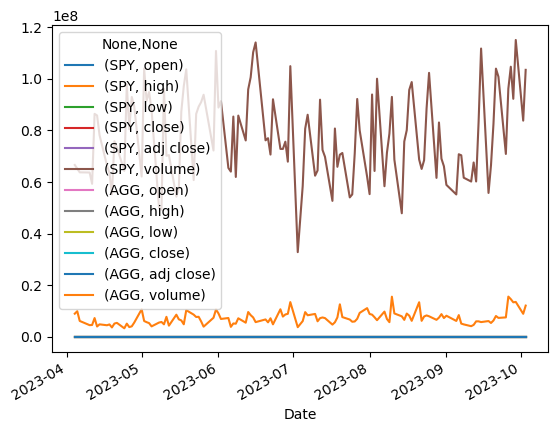

In [14]:
# Plot daily returns of all portfolios
display(df_ticker.plot())

In [15]:
# # Reorganize the DataFrame
# # Separate ticker data
# spy = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)
# govt = df_ticker[df_ticker['symbol']=='GOVT'].drop('symbol', axis=1)

# # Concatenate the ticker DataFrames
# df_ticker = pd.concat([spy, govt], axis=1, keys=["SPY", "GOVT"])

# # Display sample data
# # display(df_ticker.head()
# # display(df_ticker.tail()
# print(df_ticker)


### The MCForecastTools Library at a Glance

In [16]:
#Print the documentation of the MCSimulation module of the MCForecastTools library
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

### Run 6 months portfolio growth using Monte Carlo simulation


Build (5) portfolios, corresponding to different benchmark risk/reward levels


Conservative 100/0% (Bonds/Stocks) ("SPY"SP500 Index/"AGG" BondETF)
Moderately Conservative* 60/40%
Moderate 40/60%
Moderately Aggressive  20/80%
Aggressive 0/100%


In [17]:
import numpy as np

# # Configuring a Monte Carlo simulation to forecast 6 months cumulative returns
# # use 500 runs and 40(AGG)/60(SPY) portfolio.
MC_six_months = MCSimulation(portfolio_data = 
    df_ticker,
    # portfolio_data = pd.DataFrame,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252
)
# portfolio_data : pandas.DataFrame
#     portfolio dataframe

# # Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# # use 500 runs and 40(AGG)/60(SPY) portfolio.
# MC_six_months = MCSimulation(
#     portfolio_data = df_stock_data,
#     weights = [.40, .60],
#     num_simulation = 500,
#     num_trading_days = 252*30


# # Set number of simulations
# num_sims = 500

# # Configure a Monte Carlo simulation to forecast one year daily returns
# MC_six_months = MCSimulation(
#     portfolio_data = df_ticker,
#     num_simulation = num_sims,
#     num_trading_days = 252
# )

In [18]:
# # Printing the simulation input data
# MC_six_months.head()

In [19]:
# # Set number of simulations
# num_sims = 500

# # # Configure a Monte Carlo simulation to forecast one year daily returns
# MC_SPY = MCSimulation(
#     portfolio_data = df_ticker,
#     num_simulation = num_sims,
#     num_trading_days = 252
# )

In [20]:
# # Set number of simulations
# num_sims = 500

# # # Configure a Monte Carlo simulation to forecast one year daily returns
# MC_AGG = MCSimulation(
#     portfolio_data = df_ticker ==["AGG"],
#     num_simulation = num_sims,
#     num_trading_days = 252
# )

In [21]:
# # Configuring a Monte Carlo simulation to forecast 6 months cumulative returns
MC_sixmonths = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 126 #6 months of trading days
)



In [22]:
# Printing the simulation input data
MC_sixmonths.portfolio_data.head()

SPY                                                  \
                  open        high         low       close   adj close   
Date                                                                     
2023-04-04  411.619995  411.920013  407.239990  408.670013  405.726471   
2023-04-05  407.910004  408.700012  405.880005  407.600006  404.664154   
2023-04-06  406.769989  409.480011  405.679993  409.190002  406.242706   
2023-04-10  406.609985  409.690002  405.970001  409.609985  406.659668   
2023-04-11  410.260010  411.179993  408.920013  409.720001  406.768860   

                                         AGG                          \
              volume daily_return       open        high         low   
Date                                                                   
2023-04-04  66601500          NaN  98.613068  100.190002  100.300003   
2023-04-05  65200200    -0.002618  98.947716  100.529999  100.980003   
2023-04-06  63743300     0.003901  98.859146  100.440002  100.690002   
2023-04-10  63681000     0.001026  98.180000   99.750000   99.910004   
2023-04-11  59297900     0.000269  98.239052   99.809998   99.879997   

                                                          
                 close   adj close   volume daily_return  
Date                                                      
2023-04-04   99.500000   99.550003  8925200          NaN  
2023-04-05  100.410004  100.500000  9883500     0.009146  
2023-04-06  100.440002  100.559998  6105200     0.000299  
2023-04-10   99.599998   99.889999  4478000    -0.008363  
2023-04-11   99.589996   99.809998  4543800    -0.000100

In [23]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
MC_sixmonths.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006299,1.003569,0.994633,1.007991,0.992678,1.003853,0.999178,1.006267,0.994199,0.999654,...,0.999804,1.000939,1.001708,1.006147,0.997433,0.998864,1.000292,0.999885,1.004846,0.994441
2,0.996609,1.001000,0.988903,1.010675,0.989241,1.001625,0.993064,0.992449,0.995199,1.000032,...,0.995865,0.996992,1.002081,1.002035,1.006327,0.997663,0.999571,1.005033,1.009016,1.005943
3,0.998340,1.000203,0.987549,1.005226,1.000475,0.993652,0.993829,0.988101,0.992531,1.000165,...,0.994931,0.995785,1.000253,1.000533,1.012335,1.000450,0.992141,1.003747,1.006221,0.999176
4,1.003110,1.000116,0.981743,1.001833,0.997192,0.999566,1.000133,0.995949,0.995900,0.992282,...,0.987464,0.989858,1.003018,0.998327,1.013847,1.001165,0.990375,1.003832,1.013454,0.989907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,0.964765,1.056247,1.001053,0.960351,1.062535,1.022870,0.986201,0.864631,0.996560,0.917127,...,0.934643,0.921756,0.916292,1.017224,1.044641,0.913114,1.006881,1.025377,0.940470,0.988845
123,0.968529,1.058497,1.000447,0.964923,1.063344,1.022044,0.988796,0.863187,0.997711,0.922573,...,0.938844,0.914998,0.925120,1.014883,1.051772,0.919068,1.015357,1.020788,0.933132,0.989014
124,0.956756,1.054996,1.006639,0.961598,1.068273,1.015214,0.986936,0.861620,1.003356,0.923105,...,0.936730,0.920480,0.928419,1.024625,1.051159,0.918481,1.015958,1.008454,0.929409,0.993941
125,0.948189,1.060001,1.011196,0.964230,1.070906,1.017612,0.998549,0.860349,1.006396,0.918503,...,0.943239,0.922989,0.931821,1.022088,1.042985,0.927732,1.011872,1.009747,0.926684,0.991472


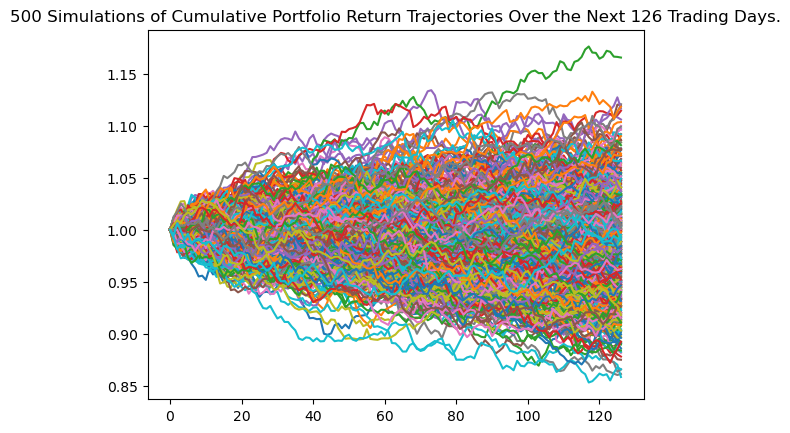

In [24]:
# Plot simulation outcomes
line_plot = MC_sixmonths.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_sixmonths_sim_plot.png", bbox_inches="tight")

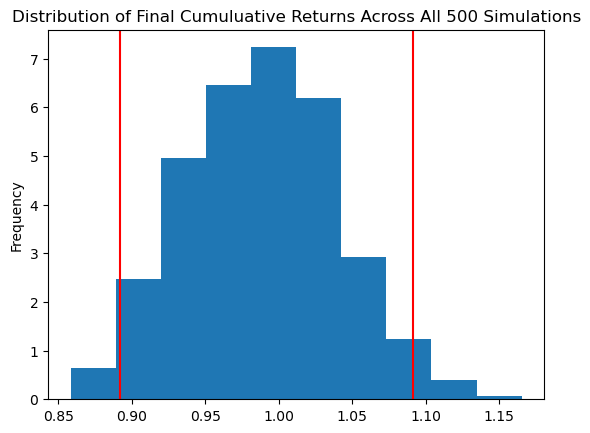

In [25]:
# Plot probability distribution and confidence intervals
dist_plot = MC_sixmonths.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_sixmonths_dist_plot.png',bbox_inches='tight')

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
forecast_sumstat = MC_sixmonths.summarize_cumulative_return()

# Print summary statistics
forecast_sumstat

AttributeError: 'Series' object has no attribute 'append'

In [ ]:
# # Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in SP500 and AGG
# ci_lower = round(tbl[8]*10000,2)
# ci_upper = round(tbl[9]*10000,2)

# # Print results
# print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
#       f" over the next 5 years will end within in the range of"
#       f" ${ci_lower} and ${ci_upper}")